# Support Vector Machine: Hyperparameter Tuning with GridSearchCV

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the <em>load</em> function:

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

The data set is presented in the form of a dictionary:

In [5]:
cancer.keys() # elementos que podemos consultar em relacao ao dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can obtain information and arrays from this dictionary to set up our data frame and understand the features:

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Set up the dataframe

In [10]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

Now let's check the dataframe:

In [12]:
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


## Exploratory Data Analysis

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,np.ravel(df_target),test_size=0.3,random_state=2021)

<Axes: xlabel='Cancer', ylabel='count'>

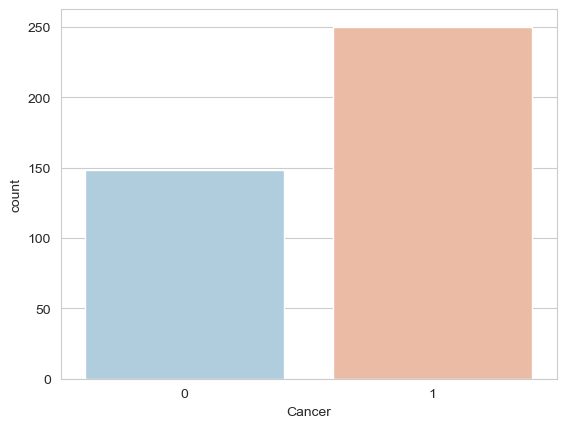

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Cancer', data=pd.DataFrame(y_train,columns=['Cancer']),palette='RdBu_r')

<Axes: xlabel='Cancer', ylabel='count'>

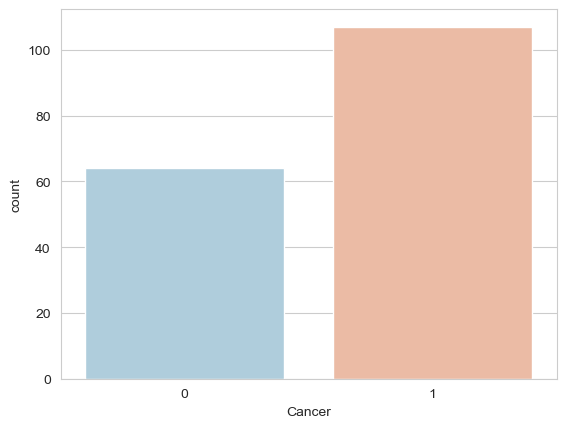

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Cancer',data=pd.DataFrame(y_test,columns=['Cancer']),palette='RdBu_r')

## **Model Parameters**
A model’s (internal) configuration variable whose value is estimated from the training data, i.e., the value is not set manually. Examples include:
- <em>Weights</em> in Artificial Neural Networks
- <em>Support vectors</em> in Support Vector Machines

## **Model Hyperparameters**
A model’s (external) configuration variable whose value can be set manually. It is difficult to know the best value for each hyperparameter in advance. Tuning a model consists of finding the best (or at least a good) configuration of the hyperparameters. Examples include:
- <em>Optimizer</em> and <em>learning rate</em> in Artificial Neural Networks
- <em>C</em> and <em>gamma</em> in Support Vector Machines
- <em>Quality measure</em> and <em>Pruning method</em> in Decision Trees


## Train the Support Vector Classifier

### 10-Fold Cross Validation

Let's try the Cross Validation technique with 10 folds:

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [44]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model,df_feat,np.ravel(df_target),cv=10)
scores

array([0.89473684, 0.84210526, 0.89473684, 0.92982456, 0.92982456,
       0.92982456, 0.94736842, 0.92982456, 0.92982456, 0.91071429])

In [20]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

0.91 accuracy with a standard deviation of 0.03


And now without Cross Validation:

In [21]:
from sklearn.svm import SVC

In [46]:
model = SVC(random_state=2021)

In [47]:
model.fit(X_train,y_train)

SVC(random_state=2021)

### Predictions and evaluations

Let's predict using the trained model:

In [48]:
predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [27]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.92 accuracy


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        64
           1       0.90      0.97      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



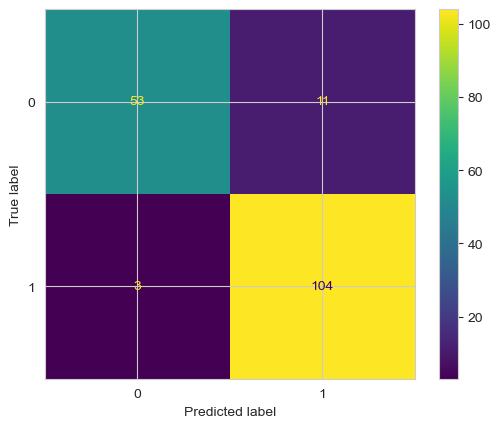

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.show()

## GridSearch

- Finding the right parameters (such as the values of <em>C</em> or <em>gamma</em> to use) is a complicated task
- The idea of creating a "grid" of parameters and trying out all the possible combinations is called <em>GridSearch</em>
    - This method is common enough for Scikit-learnto have this functionality incorporated with <em>GridSearchCV</em> (<em>CV</em> stands for <em>Cross-Validation</em>)
    - <em>GridSearchCV</em> receives a dictionary describing the parameters to be tried and the model to be trained
    - The parameter grid is defined as a dictionary in which the keys are the parameters and the values are the settings to be tested

In [59]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [60]:
from sklearn.model_selection import GridSearchCV

- <em>GridSearchCV</em> is a meta-estimator
- It takes an estimator like <em>SVC</em> and creates a new estimator that behaves in exactly the same way - in this case, like a classifier

Add <em>refit=True</em> and choose verbose for the number you want (<em>verbose</em> means the text output that describes the process)

### Train a model with GridSearchCV

Now its time to train a Support Vector Machine Classifier

Call the <em>SVC()</em> model from sklearn and fit the model to the training data:

In [61]:
grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True,verbose=3)

What fit does:
- Runs the same cycle with cross-validation to find the best combination of parameters
- Once it has the best combination, it runs the fit again on all the data passed to the fit (without cross-validation) to build a single new model using the best parameter setting

In [62]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the <em>best_params_</em> attribute and the best estimator in the <em>best\_estimator_</em> attribute:

In [63]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [64]:
grid.best_estimator_

SVC(C=1, gamma=0.0001, random_state=2021)

Then you can re-run predictions on this grid object just as you would with a normal model:

In [65]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [66]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [67]:
dt_model = DecisionTreeClassifier(random_state=2022)

In [68]:
svc_model = SVC(random_state=2022)

In [69]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2022)

In [70]:
svc_model.fit(X_train,y_train)

SVC(random_state=2022)

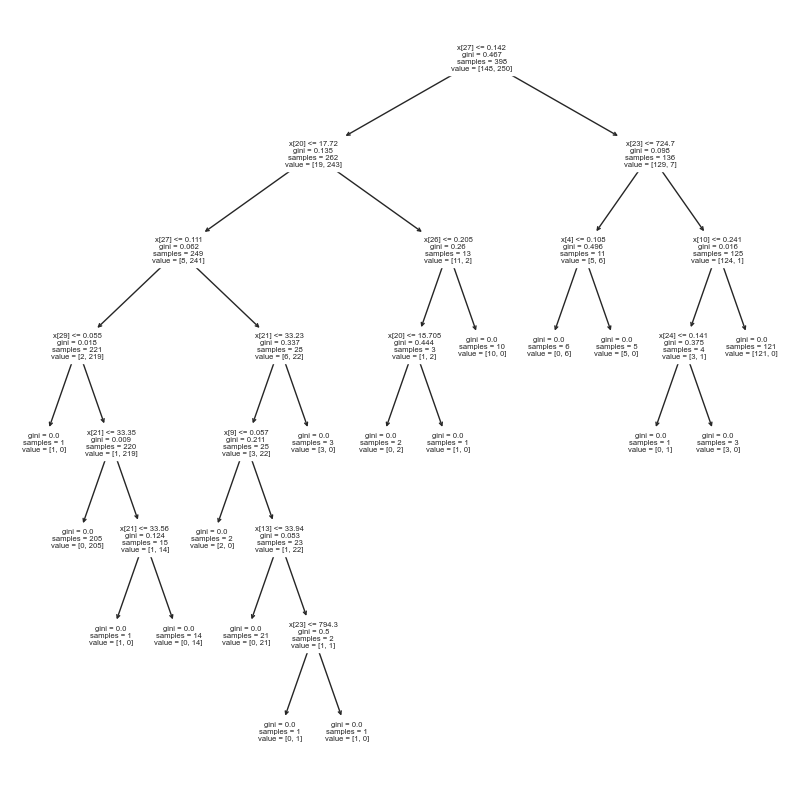

In [72]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt_model)
plt.show()

fig.savefig("dt_plot.png")

In [73]:
text_representation = tree.export_text(dt_model)
print(text_representation)

with open("dt_text.log","w") as fout:
    fout.write(text_representation)

|--- feature_27 <= 0.14
|   |--- feature_20 <= 17.72
|   |   |--- feature_27 <= 0.11
|   |   |   |--- feature_29 <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_29 >  0.06
|   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.11
|   |   |   |--- feature_21 <= 33.23
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- feature_13 <= 33.94
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_13 >  33.94
|   |   |   |   |   |   |--- feature_23 <= 794.30
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_23 >  794.30
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_21 >  33.23
|

In [82]:
tree_pred = dt_model.predict(X_test)

In [83]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
print(accuracy_score(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

0.9590643274853801
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [84]:
svc_pred = svc_model.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
print(accuracy_score(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

0.9181286549707602
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        64
           1       0.90      0.97      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



In [87]:
print(dt_model.get_depth())
print(dt_model.get_n_leaves())

7
17


In [88]:
max_depth = dt_model.get_depth()
max_depth

7

In [90]:
param_grid = {'max_depth':[max_depth for max_depth in range(1,max_depth+1)]}
estimator = DecisionTreeClassifier(random_state=42)
max_depth_grid_search=GridSearchCV(estimator,param_grid)
max_depth_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [91]:
max_depth_grid_search.best_params_

{'max_depth': 3}

In [92]:
max_depth_tree = max_depth_grid_search.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=3, random_state=42)


In [93]:
best_max_depth = max_depth_tree.get_depth()
print(best_max_depth)

3


In [94]:
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
ccp_alphas

array([0.        , 0.00240332, 0.00249246, 0.00250114, 0.00335008,
       0.00495701, 0.00515398, 0.00804782, 0.01370489, 0.01467554,
       0.04113999, 0.34524111])

In [96]:
estimator.get_params().keys()
param_grid = {'ccp_alpha':[alpha for alpha in ccp_alphas]}